<font size="5">**Exploratory Data Analysis**</font>

The dataset consists of information about data of titanic ship and their Name, Age, Fare, class and wheather they survived or not all these informations are provided.

**Logistic Regression - Problem statement**

**Agenda:**

Using logistic regression you predict whether a passenger is alive or not.

**Inference to be shown:**

You have more than one feature here, and If the value of the model predicts 0.79, that would mean a person is 79% alive and 21% dead.

**Intermediate steps involved:**

1. Countplot for survived vs sex
2. Find out the number of missing values
3. Boxplot for P-class and age
4. Heatmap to check for null values.

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [3]:
#Importing the data set
titanic_data = pd.read_csv(r"C:/Users\DELL\Desktop\data\titanic.csv") #reading the dataset
titanic_data

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [4]:
df = titanic_data.copy() #Creating a copy of data to work on

In [5]:
df.info() #getting information and datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
df.isnull() #Checking for null values

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
882,False,False,False,False,False,False,False,False
883,False,False,False,False,False,False,False,False
884,False,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum() #Getting the total null values in each column.

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

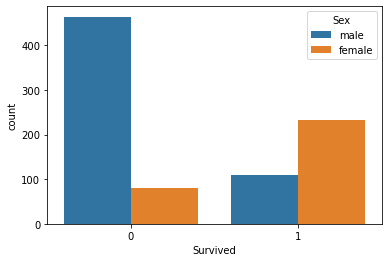

In [8]:
sns.countplot(x="Survived", hue="Sex", data=df) #Checking how many males and females survived.

We can infere that chances of serviving of a male is lesser than a female. 

<AxesSubplot:ylabel='Frequency'>

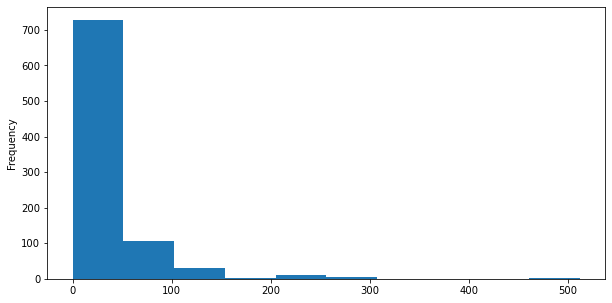

In [9]:
df["Fare"].plot.hist(figsize=(10,5)) #Count of person who travelled in titanic

We can see that most of the people paid fare between 0 to 100 which was for class 3 and very less people opted class 1 with fare beyond 400-500.

<AxesSubplot:xlabel='Age', ylabel='count'>

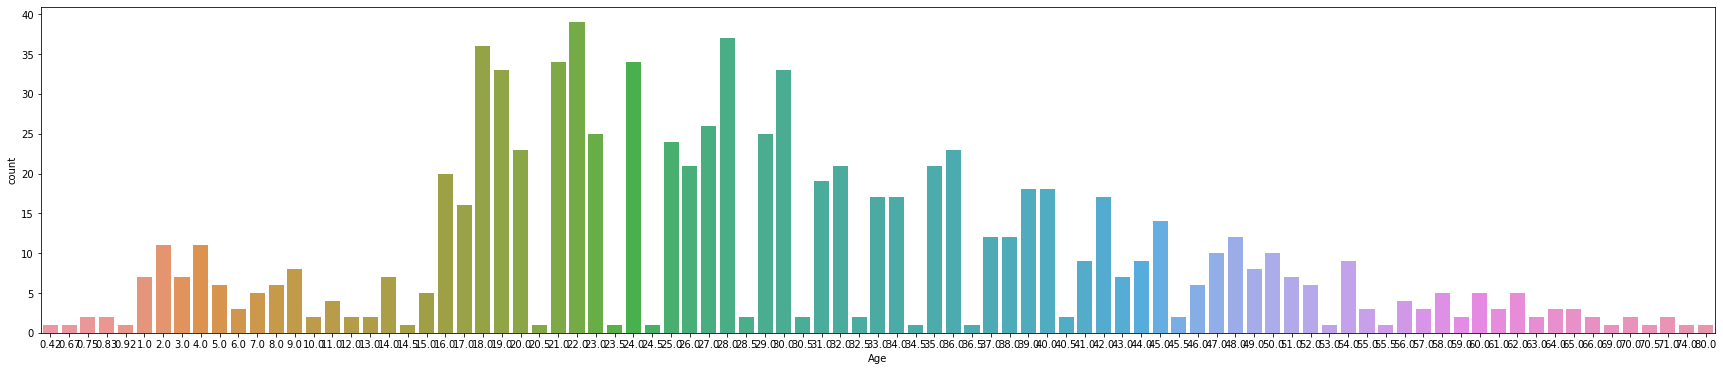

In [14]:
plt.figure(figsize=(30,6))
sns.countplot(x="Age",data=df)

The curve is normally distributed and most of the people who travelled in titanic were having age between 16-38.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

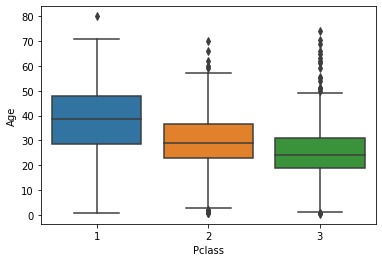

In [15]:
sns.boxplot(x="Pclass", y="Age", data=df) #Box plot between class and age of the passengers.

Passengers travelling in class 1 & 2 are older than class 3.

<AxesSubplot:>

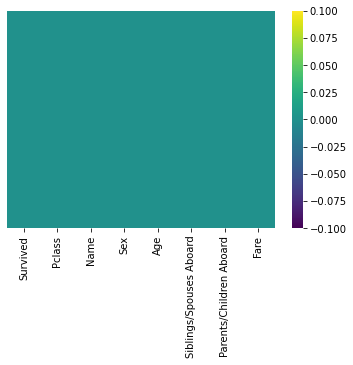

In [16]:
sns.heatmap(df.isnull(),yticklabels=False, cmap= 'viridis') # heatmap to check for null values

In [17]:
#We are going to convert categorical data of sex column into numeric for this we used get_dummies function of pandas.
#It will create two columns, one for male, one for female.Than we removed the first column also because one column indicates the value of the other column.
sex = pd.get_dummies(df["Sex"],drop_first=True)
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
pcl = pd.get_dummies(df["Pclass"],drop_first= True) #converting the categorical column Pclass into numerical. and removing first column
pcl.head(5)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [19]:
df= pd.concat([df,sex,pcl], axis=1) #concatnating sex and pcl dataframes into original dataframe.
df.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,1,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,0,0,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,0,0,1
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,0,0,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,1,0,1


In [20]:
df.drop(["Sex","Pclass","Name"], axis=1,inplace= True) #dropping the unnecessory columns.
df.head()

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male,2,3
0,0,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,1,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,0
4,0,35.0,0,0,8.0500,1,0,1


In [21]:
#Now our dataset is ready for the model.X will contain all the features and y will contain the target variable
X = df.drop("Survived",axis=1)
y = df["Survived"]

<font size="5">**Logistic regression machine learning model**</font>

In [22]:
from sklearn.model_selection import train_test_split  

In [28]:
#We will use train_test_split from model_selection module to split our data. 70% of the data will be training data and %30 will be testing data.
#random state will take same sample every time will try to change for every sample
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=1)  


In [29]:
#use Logistic Regression to train the model:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
#Let’s see how accurate is our model for predictions
predictions = logmodel.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       106
           1       0.76      0.71      0.73        72

    accuracy                           0.79       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.79      0.79      0.79       178



We got 79% accuraccy. 

In [31]:
from sklearn.metrics import confusion_matrix #Let’s see the confusion matrix
confusion_matrix(y_test, predictions)

array([[90, 16],
       [21, 51]], dtype=int64)

True positive: 90 (We predicted a positive result and it was positive)
True negative: 51 (We predicted a negative result and it was negative)
False positive: 16 (We predicted a positive result and it was negative)
False negative: 21 (We predicted a negative result and it was positive)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7921348314606742